<a href="https://colab.research.google.com/github/VMBoehm/N3AS_Project_Malika/blob/main/3_Copy_of_First_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
from sklearn import datasets as datasets
from sklearn import model_selection as ms
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
random_seed = 1534

In [3]:
## TASK: Play with different class_sep parameters, how does the model accuracy degrade/improve?
dataset = datasets.make_classification(n_samples=1000, n_features=4, random_state=random_seed, class_sep= 3)
## n_features = 5 does something weird, We talked about class_sep last monday.

In [4]:
features, labels = dataset
print(features.shape)

(1000, 4)


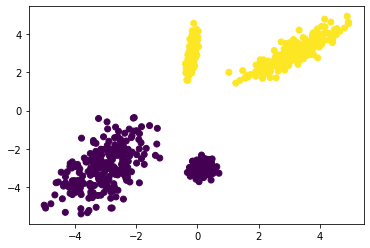

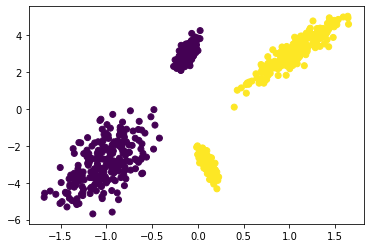

In [5]:
plt.scatter(features[:,0],features[:,1], c=labels)
plt.show()
plt.scatter(features[:,2],features[:,3], c=labels)
plt.show()

In [6]:
X_train, X_test, y_train, y_test = ms.train_test_split(features,labels, test_size = 0.2)

In [7]:
print('X_train:',np.shape(X_train))
print('y_train:',np.shape(y_train))
print('X_test:',np.shape(X_test))
print('y_test:',np.shape(y_test))

X_train: (800, 4)
y_train: (800,)
X_test: (200, 4)
y_test: (200,)


In [8]:
import tensorflow
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense

In [9]:
basic_model = Sequential()

In [10]:


# Adding layers to the model
# First layers: 16 neurons/perceptrons that takes the input and uses Leaky ReLU activation function.

basic_model.add(Dense(units = 4 , activation = 'LeakyReLU', input_shape = (4,))) 
# Second layer: 1 neuron/perceptron that takes the input from the 1st layers and gives output as 0 or 1.Activation used is 'Hard Sigmoid'

# TASK: Can you change the output to be probabilistic (probability for each class) by using 'softmax' as an activation function?
#basic_model.add(Dense(1, activation = 'hard_sigmoid'))
### This is what I added. I think this is right.
basic_model.add(Dense(2, activation='softmax'))


In [11]:
# TASK optional): How does the Adam optimizer work? 
# from googling I have learned that the adam Optimizer is a Stochastic optimization. Which means its does graident optmaztion. I am acutally not really sure how it works
## I found this paper about it https://arxiv.org/pdf/1412.6980.pdf but its a little hard to understand.
## I know that basically it find how to get down hill the fastest
opt = keras.optimizers.Adam(learning_rate=0.01)
#TASK: What is binary cross entropy? What does it measure?
basic_model.compile(loss = 'sparse_categorical_crossentropy', optimizer = opt, metrics = ['accuracy'])
## the Binary cross entropy is ued for our loss paramter which calculates the degree of errror. A neural network measures doesn't measure 
# acurracy but instead loss. This is than used to measure accuracy. Binary_crossentropy is used when you have a binary system like cats or dogs or 1 and 0




In [12]:
# TASK: add validation data (https://keras.io/api/models/model_training_apis/)
basic_model.fit(X_train, y_train, epochs=50, validation_data= (X_test, y_test))

Epoch 1/50
25/25 [==============================] - 2s 29ms/step - loss: 0.5807 - accuracy: 0.6925 - val_loss: 0.1698 - val_accuracy: 1.0000
Epoch 2/50
25/25 [==============================] - 0s 5ms/step - loss: 0.1013 - accuracy: 1.0000 - val_loss: 0.0525 - val_accuracy: 1.0000
Epoch 3/50
25/25 [==============================] - 0s 8ms/step - loss: 0.0388 - accuracy: 1.0000 - val_loss: 0.0257 - val_accuracy: 1.0000
Epoch 4/50
25/25 [==============================] - 0s 6ms/step - loss: 0.0211 - accuracy: 1.0000 - val_loss: 0.0159 - val_accuracy: 1.0000
Epoch 5/50
25/25 [==============================] - 0s 4ms/step - loss: 0.0137 - accuracy: 1.0000 - val_loss: 0.0109 - val_accuracy: 1.0000
Epoch 6/50
25/25 [==============================] - 0s 6ms/step - loss: 0.0097 - accuracy: 1.0000 - val_loss: 0.0081 - val_accuracy: 1.0000
Epoch 7/50
25/25 [==============================] - 0s 7ms/step - loss: 0.0073 - accuracy: 1.0000 - val_loss: 0.0063 - val_accuracy: 1.0000
Epoch 8/50
25/25 [=

In [53]:
train_p=basic_model.predict(X_train)



In [14]:
loss_and_metrics = basic_model.evaluate(X_test, y_test)
print('Loss = ',loss_and_metrics[0])
print('Accuracy = ',loss_and_metrics[1])


7/7 [==============================] - 0s 3ms/step - loss: 1.6008e-04 - accuracy: 1.0000
Loss =  0.00016008131206035614
Accuracy =  1.0


In [51]:
## calulating accuracy from scartch
## so this is a binary acuraccy calcuation


y_pred = (X_test >= 0.5).astype('int')
y_pred = y_pred[:, 0]
y_pred_train = (X_train >= 0.5).astype('int')
y_pred_train = y_pred_train[:, 0]

def compute_tp_tn_fn_fp(act, pred):

	tp = sum((act == 1) & (pred == 1))
	tn = sum((act == 0) & (pred == 0))
	fn = sum((act == 1) & (pred == 0))
	fp = sum((act == 0) & (pred == 1))
	return tp, tn, fp, fn

tp, tn, fp, fn = compute_tp_tn_fn_fp(y_test,y_pred )

tp_t, tn_t, fp_t, fn_t = compute_tp_tn_fn_fp(y_train,y_pred_train )

def compute_accuracy(tp, tn, fn, fp):
  return((tp + tn) * 100)/ float( tp + tn + fn + fp)
  
print("test acuuracy",compute_accuracy(tp, tn, fn, fp))

print("train accuracy",compute_accuracy(tp_t, tn_t, fp_t, fn_t))

print(y_test)
print(y_pred)

test acuuracy 75.0
train accuracy 74.125
[0 1 1 0 1 0 1 0 1 1 1 1 1 1 1 0 0 0 1 0 0 0 1 0 0 1 1 1 0 1 0 0 0 1 0 1 1
 1 1 1 0 1 1 0 1 0 1 0 0 0 0 0 0 1 0 1 0 1 0 0 0 1 0 1 0 1 1 0 0 1 0 1 1 0
 1 1 0 1 1 1 1 1 1 1 0 0 0 1 0 1 0 0 1 0 1 1 1 1 1 1 0 0 0 0 1 0 1 0 0 1 1
 0 1 0 0 0 1 1 0 1 0 1 0 0 0 0 1 1 0 1 1 0 1 1 0 1 0 1 1 0 0 1 1 0 0 0 0 1
 0 0 0 1 1 0 1 0 0 1 0 0 1 0 0 0 1 1 0 1 1 0 1 1 1 1 0 1 0 1 1 1 0 1 1 0 1
 1 1 1 0 1 1 1 1 0 0 1 1 0 1 1]
[0 1 0 0 0 0 1 0 1 1 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 1 0
 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0
 1 1 0 1 1 1 0 1 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 1 0 0 1
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 1 1 0 0 0 1 0 0 0 0 1
 0 0 0 1 1 0 1 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 1 0 1 1 1 0 1 0 0 0
 1 1 0 0 1 1 1 0 0 0 1 0 0 1 0]


In [58]:
#TASK: create an ROC plot! compute AUROC
####This was very wrong but I wanted to keep it just in case.

import sklearn.metrics as metrics
from sklearn.metrics import roc_curve, auc
y_pred = (X_test >= 0.5).astype('int')
y_pred = y_pred[:, 0]
nn_fpr_keras, nn_tpr_keras, nn_thresholds_keras = roc_curve(y_test, y_pred)
auc_keras = auc(nn_fpr_keras, nn_tpr_keras)
plt.plot(nn_fpr_keras, nn_tpr_keras, marker='.', label='Neural Network (auc = %0.3f)' % auc_keras)

IndexError: ignored

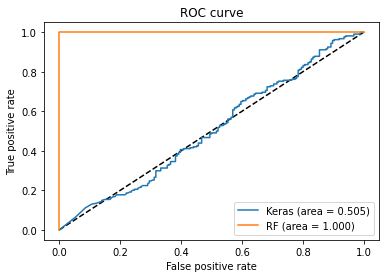

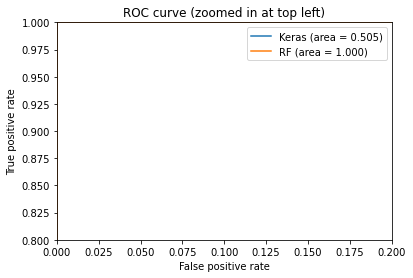

In [18]:
## I used this Site https://www.dlology.com/blog/simple-guide-on-how-to-generate-roc-plot-for-keras-classifier/
from sklearn.metrics import roc_curve
data_x = np.resize(X_test,(400,4))
data_y = np.resize(y_test,(400))
y_pred_keras = basic_model.predict(X_test).ravel()
fpr_keras, tpr_keras, thresholds_keras = roc_curve(data_y, y_pred_keras)

from sklearn.metrics import auc
auc_keras = auc(fpr_keras, tpr_keras)

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth=3, n_estimators=10)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_pred_rf)
auc_rf = auc(fpr_rf, tpr_rf)

plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.plot(fpr_rf, tpr_rf, label='RF (area = {:.3f})'.format(auc_rf))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()
# Zoom in view of the upper left corner.
plt.figure(2)
plt.xlim(0, 0.2)
plt.ylim(0.8, 1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.plot(fpr_rf, tpr_rf, label='RF (area = {:.3f})'.format(auc_rf))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve (zoomed in at top left)')
plt.legend(loc='best')
plt.show()